In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("D:\\Datasets\\winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
good=df[df['quality']>=7]
bad=df[df['quality']<=6]
sample=bad.sample(n=220)
df=pd.concat([good,sample],axis=0)

In [12]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
657,12.0,0.500,0.59,1.4,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,7
949,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
1347,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,5
771,9.4,0.685,0.26,2.4,0.082,23.0,143.0,0.99780,3.28,0.55,9.4,5


In [104]:
scale = ColumnTransformer([('scale',StandardScaler(),slice(0,11))])

In [105]:
model = RandomForestClassifier(n_estimators=75)

In [106]:
pipe = make_pipeline(scale,model)

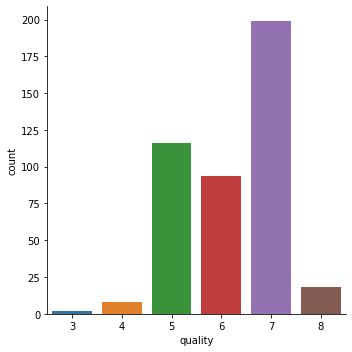

In [17]:
sns.catplot(data=df,x='quality',kind='count')
plt.show()

In [18]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.286924,0.723970,0.176298,0.075262,-0.153340,-0.161526,0.682032,-0.732465,0.199984,-0.137477,0.144721
volatile acidity,-0.286924,1.000000,-0.571501,0.004995,0.113651,0.097617,0.161858,0.076268,0.288151,-0.343900,-0.240559,-0.431719
citric acid,0.723970,-0.571501,1.000000,0.230541,0.119696,-0.118605,-0.036067,0.369852,-0.613902,0.330403,0.154177,0.290515
residual sugar,0.176298,0.004995,0.230541,1.000000,0.041658,0.066261,0.211420,0.311665,-0.160353,0.018434,0.121048,0.074355
chlorides,0.075262,0.113651,0.119696,0.041658,1.000000,-0.057466,-0.030938,0.237206,-0.198032,0.218302,-0.256008,-0.205096
free sulfur dioxide,-0.153340,0.097617,-0.118605,0.066261,-0.057466,1.000000,0.678536,-0.046605,0.093209,-0.007990,-0.095470,-0.162457
total sulfur dioxide,-0.161526,0.161858,-0.036067,0.211420,-0.030938,0.678536,1.000000,-0.002991,0.011576,-0.020068,-0.142053,-0.250699
density,0.682032,0.076268,0.369852,0.311665,0.237206,-0.046605,-0.002991,1.000000,-0.390463,0.116731,-0.560963,-0.251363
pH,-0.732465,0.288151,-0.613902,-0.160353,-0.198032,0.093209,0.011576,-0.390463,1.000000,-0.148544,0.216581,-0.097314
sulphates,0.199984,-0.343900,0.330403,0.018434,0.218302,-0.007990,-0.020068,0.116731,-0.148544,1.000000,0.163838,0.297839


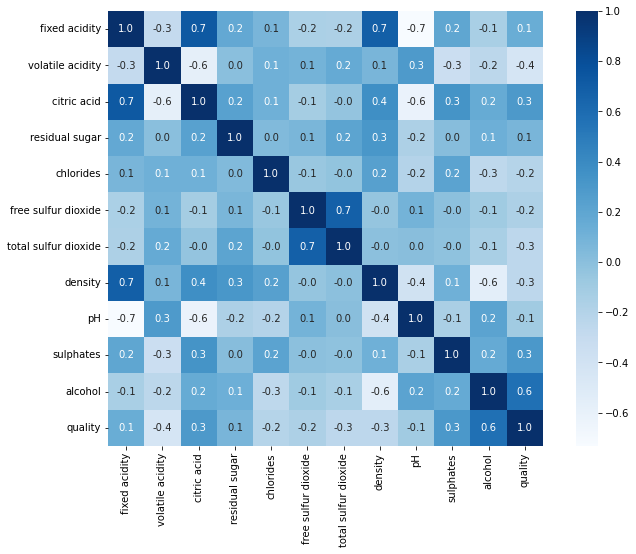

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),square=True,annot=True,fmt='0.1f',cmap='Blues')
plt.show()

In [20]:
x=df.drop(columns="quality",axis=1)
y=df.quality

In [21]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5


In [22]:
y.head()

7     7
8     7
16    7
37    7
62    7
Name: quality, dtype: int64

In [23]:
y=df.quality.apply(lambda y_value:1 if y_value>=7 else 0)

In [24]:
y.value_counts()

0    220
1    217
Name: quality, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [107]:
from sklearn import set_config
set_config(display='diagram')

pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=75))])

In [108]:
prediction = pipe.predict(x_train)

In [109]:
accuracy_score(y_train,prediction)

1.0

In [110]:
prediction = pipe.predict(x_test)

In [111]:
accuracy_score(y_test,prediction)

0.8181818181818182

In [112]:
import pickle

In [113]:
pickle.dump(pipe,open("wine_quality_detection.pkl",'wb'))